In [1]:
### TREND LINE IN PETROLEUM COKE ####

#import libraries
import pandas as pd
import matplotlib.pyplot as plt 

# read all files
xls = pd.ExcelFile('PT_Consumption_H.xls')
df1 = pd.read_excel(xls, '2017-18')
df2 = pd.read_excel(xls, '2018-19')
df3 = pd.read_excel(xls, '2019-20')
df4 = pd.read_excel(xls, '2020-21 (P)')

In [2]:
# drop unwanted variables
df1 = df1.drop([df1.index[0] , df1.index[1], df1.index[2], df1.index[3], df1.index[4], df1.index[5], df1.index[20], df1.index[21], df1.index[22], df1.index[23], df1.index[24], df1.index[25], df1.index[26]])
df2 = df2.drop([df2.index[0] , df2.index[1], df2.index[2], df2.index[3], df2.index[4], df2.index[5], df2.index[20], df2.index[21], df2.index[22], df2.index[23], df2.index[24], df2.index[25]])
df3 = df3.drop([df3.index[0] , df3.index[1], df3.index[2], df3.index[3], df3.index[4], df3.index[5], df3.index[20], df3.index[21], df3.index[22], df3.index[23], df3.index[24], df3.index[25]])
df4 = df4.drop([df4.index[0] , df4.index[1], df4.index[2], df4.index[3], df4.index[4], df4.index[5], df4.index[20], df4.index[21], df4.index[22], df4.index[23], df4.index[24], df4.index[25], df4.index[26]])

In [4]:
# set the column names
new_header = df1.iloc[0] # selecting the zeroth row
df1 = df1[1:] # eliminating the zeroth row
df1.columns = new_header # renaming variables name from the zeroth row extracted

new_header = df2.iloc[0] 
df2 = df2[1:] 
df2.columns = new_header 

new_header = df3.iloc[0]
df3 = df3[1:]
df3.columns = new_header 

new_header = df4.iloc[0] 
df4 = df4[1:] 
df4.columns = new_header 

In [401]:
# reseting index of the rows
df1 = df1.reset_index()
df2 = df2.reset_index()
df3 = df3.reset_index()
df4 = df4.reset_index()

In [425]:
# defining x-axis and y-axis data arrays for the plot
petroleum = [df1['MAR'][10], df1['APR'][10], df1['MAY'][10], df1['JUN'][10], 
             df2['MAR'][10], df2['APR'][10], df2['MAY'][10], df2['JUN'][10], 
             df3['MAR'][10], df3['APR'][10], df3['MAY'][10], df3['JUN'][10], 
             df4['MAR'][10], df4['APR'][10], df4['MAY'][10], df4['JUN'][10]]
year = ['MAR 2018', 'APR 2018' , 'MAY 2018' , 'JUN 2018' , 
        'MAR 2019', 'APR 2019', 'MAY 2019', 'JUN 2019', 
        'MAR 2020', 'APR 2020', 'MAY 2020', 'JUN 2020', 
        'MAR 2021', 'APR 2021', 'MAY 2021', 'JUN 2021']

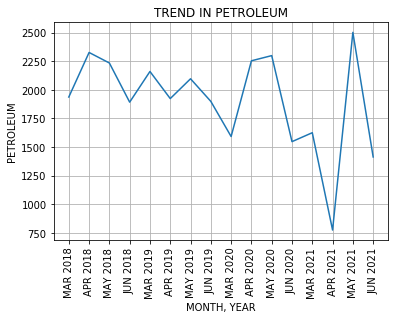

In [426]:
# plotting a line graph to see the trend in the petroleum coke variable over the period of time.
# from march 2018 to june 2021 

plt.plot(year, petroleum) # defining plot
plt.xlabel('MONTH, YEAR') # defining x-axis label
plt.ylabel('PETROLEUM') # defining y-axis label
plt.title('TREND IN PETROLEUM') # defining title
plt.grid(True) # settign up grid
plt.xticks(rotation=90) # rotating x-axis label by 90 degree
plt.savefig('petroleum trend.png') # saving the plot as an image for future use 
plt.show()

In [404]:
### TREND LINE IN FIRE ####

## read all files
fire1 = pd.read_csv('modis_2018_India.csv')
fire2 = pd.read_csv('modis_2019_India.csv')
fire3 = pd.read_csv('modis_2020_India.csv')

In [405]:
## grouping the data by each day and setting the date column
fire1.acq_date = pd.to_datetime(fire1.acq_date) # converting the fire date into datetime
fire_1 = fire1.groupby(pd.Grouper(key='acq_date', freq='1M')).sum() # groupby each 1 day
fire_1.index = fire_1.index.strftime('%B') #setting index by date

fire2.acq_date = pd.to_datetime(fire2.acq_date)
fire_2 = fire2.groupby(pd.Grouper(key='acq_date', freq='1M')).sum() # groupby each 1 month
fire_2.index = fire_2.index.strftime('%B')

fire3.acq_date = pd.to_datetime(fire3.acq_date)
fire_3 = fire3.groupby(pd.Grouper(key='acq_date', freq='1M')).sum() # groupby each 1 month
fire_3.index = fire_3.index.strftime('%B')

In [422]:
# defining x-axis and y-axis data arrays for the plot
fire = [fire_1.iloc[2]['frp'], fire_1.iloc[3]['frp'], fire_1.iloc[4]['frp'], fire_1.iloc[5]['frp'], 
             fire_2.iloc[2]['frp'], fire_2.iloc[3]['frp'], fire_2.iloc[4]['frp'], fire_2.iloc[5]['frp'],  
             fire_3.iloc[2]['frp'], fire_3.iloc[3]['frp'], fire_3.iloc[4]['frp'], fire_3.iloc[5]['frp']]
year = ['MAR 2018', 'APR 2018' , 'MAY 2018' , 'JUN 2018' , 
        'MAR 2019', 'APR 2019', 'MAY 2019', 'JUN 2019', 
        'MAR 2020', 'APR 2020', 'MAY 2020', 'JUN 2020']

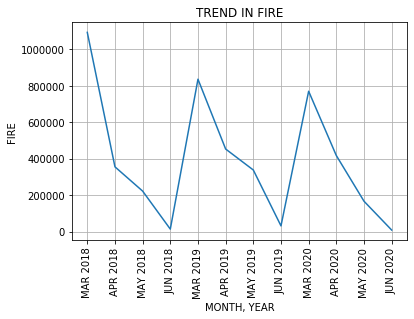

In [424]:
# plotting a line graph to show various fires over the period of time
plt.plot(year, fire) # defining plot
plt.xlabel('MONTH, YEAR') # defining x-axis label
plt.ylabel('FIRE') # defining y-axis label
plt.title('TREND IN FIRE') # defining title
plt.grid(True) # settign up grid
plt.xticks(rotation=90) # rotating x-axis label by 90 degree
plt.savefig('fire trend.png') # saving the plot as an image for future use 
plt.show()